## Bagging and Random Forests
Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

### Define the bagging classifier
In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [ ]:
# Import pandas to read csv
import pandas as pd
# Import utility functions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import BaggingClassifier

SEED = 1

# Load data
data = pd.read_csv('indian_liver_patient_preprocessed.csv')
# seprate variables
y = data['Liver_disease']
X = data.iloc[:,1:]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                         stratify = y, 
                                         random_state = SEED)

# classification tree
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.16,
                            random_state = SEED)

# bagging classifier 
bc = BaggingClassifier(base_estimator = dt, n_estimators = 50, 
                       n_jobs = -1)

### Evaluate Bagging performance
Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [25]:
# fit, predict, accuracy
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Bagging Classifier: {:.3f}'.format(accuracy))

Bagging Classifier: 0.716


### Prepare the ground
In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

In [ ]:
# Out of Bag Evaluation
# set True in oob parameter to evaluate the OOB accuracy of bc
# after training 
bc_oob = BaggingClassifier(base_estimator = dt, n_estimators = 50, 
                       oob_score = True, n_jobs = -1)

### OOB Score vs Test Set Score
Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [19]:
# Fit bc to the training set 
bc_oob.fit(X_train, y_train)
y_pred_oob = bc_oob.predict(X_test)
accuracy_oob = accuracy_score(y_test,y_pred_oob)
print('Bagging Classifier with OOB: {:.3f}'.format(accuracy_oob))
# or
accuracy_oob_exc = bc_oob.oob_score_
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(accuracy, accuracy_oob_exc))

# these result highlight how OOB evaluation can be an 
# efficient technique to obtain a perfomance estimate of a 
# bagged-ensemble on unseen data without performing cross-validation

Bagging Classifier with OOB: 0.716
Test set accuracy: 0.733, OOB accuracy: 0.711


### Train an RF regressor
In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [ ]:
# Random Forests (RF)

# download module
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE 

# instantiate a random forest 
rf = RandomForestRegressor(n_estimators = 400, 
                           min_samples_leaf = 0.16,
                           random_state = SEED)

### Evaluate the RF regressor
You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

In [24]:
# fit, predict, accuracy
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
# Evaluate the RMSE 
rmse_test = MSE(y_test, y_pred_rf)**(1/2)
print('Test RMSE of a Random Forest:{:.2f}'.format(rmse_test))

Test RMSE of a Random Forest:0.45


### Visualizing features importances
In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

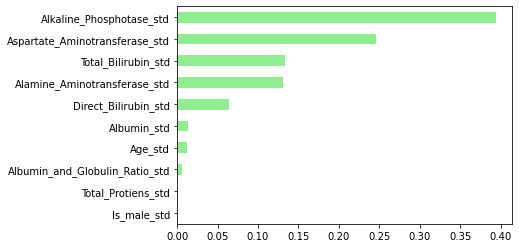

In [26]:
# visualize the feature importance
import matplotlib.pyplot as plt

# create a pd.Series
importances_rf = pd.Series(rf.feature_importances_, 
                           index = X.columns)

# sort feature importances
sorted_importances_rf = importances_rf.sort_values()

# make  a horizonral bar plot
sorted_importances_rf.plot(kind ='barh', color = 'lightgreen')
plt.title('Features Importances')
plt.show()